In [124]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
from shapely.geometry import LineString,Point,Polygon,mapping
import matplotlib.animation as animation

In [125]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [126]:
url = "https://geo.datav.aliyun.com/areas_v2/bound/100000_full.json"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.80 Safari/537.36"}
a = requests.get(url, headers=headers)
datas = gpd.read_file(a.text, ensure_ascii=False)
boundary = datas.drop(list(datas.columns[[0,2,3,4,5]]),axis=1)

In [127]:
select_row=boundary.loc[[0],:]

In [128]:
select_row.iloc[0].at['name']

'北京市'

<AxesSubplot:>

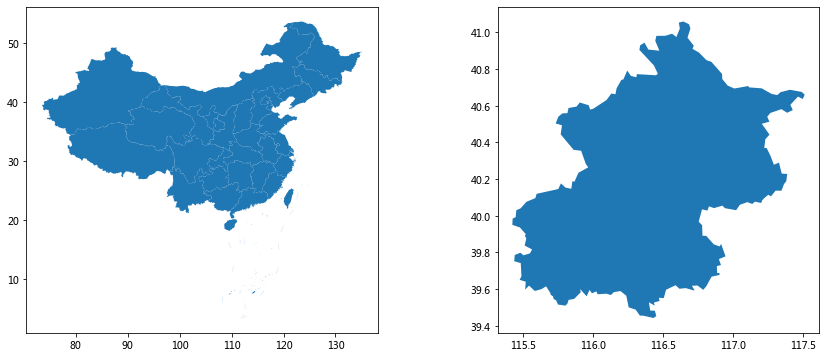

In [129]:
fig = plt.figure(figsize=(15,6))
#fig, ax = plt.subplots()
ax = fig.add_subplot(1,2,1)
boundary.plot(ax=ax)
ax1 = fig.add_subplot(1,2,2)
select_row.plot(ax=ax1)

In [130]:
b = select_row.envelope

In [131]:
coord1 = mapping(b.iloc[0])["coordinates"][0][3] #左上坐标提取
coord2 = mapping(b.iloc[0])["coordinates"][0][1] #右下坐标提取

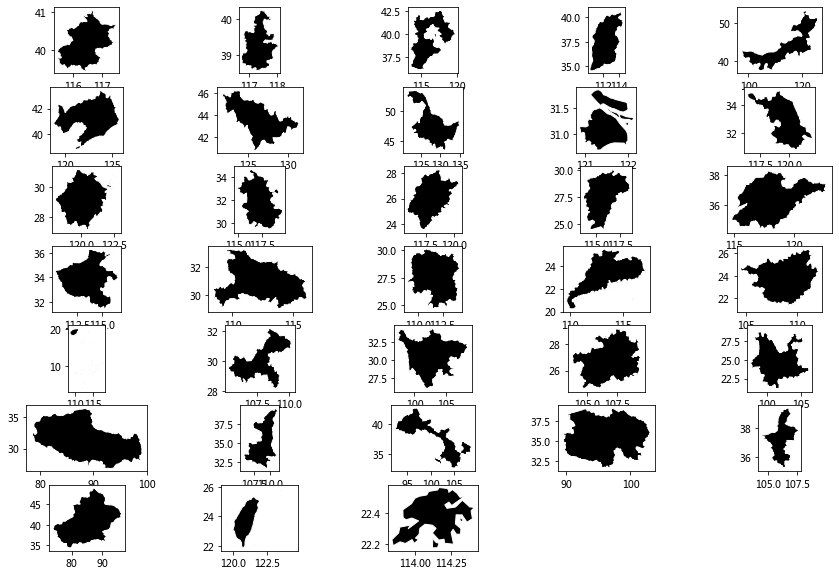

In [132]:
#测试代码
indesx = 0
fig = plt.figure(figsize=(15,10))
for i in range(0,33):
    indesx += 1
    ax = fig.add_subplot(7,5,indesx)
    select_row=boundary.loc[[indesx-1],:]
    select_row.plot(ax=ax,color="k",edgecolor="white",zorder=2)


<AxesSubplot:>

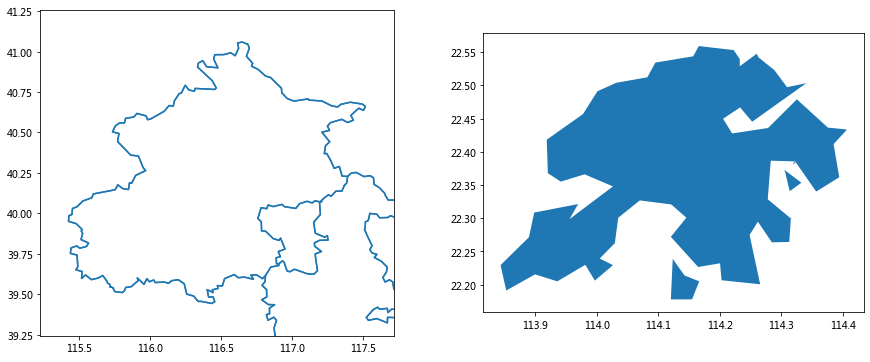

In [133]:
fig = plt.figure(figsize=(15,6))
#fig, ax = plt.subplots()
ax = fig.add_subplot(1,2,1)
boundary.boundary.plot(ax=ax)
xlim = (coord1[0]-0.2,coord2[0]+0.2)
ylim = (coord2[1]-0.2,coord1[1]+0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax1 = fig.add_subplot(1,2,2)
select_row.plot(ax=ax1)

In [134]:
def map(index):
    select_row=boundary.loc[[index],:]
    hull = select_row.envelope
    coord1 = mapping(hull.iloc[0])["coordinates"][0][3] #左上坐标提取
    coord2 = mapping(hull.iloc[0])["coordinates"][0][1] #右下坐标提取
    xlim = (coord1[0]-0.2,coord2[0]+0.2)
    ylim = (coord2[1]-0.2,coord1[1]+0.2)
    lim = [xlim,ylim]
    return lim

In [135]:
pois = gpd.read_file("/Users/creative/Documents/QGIS/data/religious.geojson")

<Figure size 1080x1080 with 0 Axes>

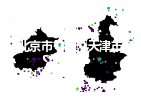

In [144]:
indesx = 0
fig = plt.figure(figsize=(15,15))
fig = plt.figure(frameon=False)
for i in range(0,2):
    indesx += 1
    ax = fig.add_subplot(1,5,indesx)
    boundary.plot(ax=ax,color="white",edgecolor="white",zorder=1,alpha=0.9)
    select_row=boundary.loc[[indesx-1],:]
    select_row.plot(ax=ax,color="k",edgecolor="white",zorder=2)
    pois.plot(ax=ax,column='CH_Name_Ty',cmap="viridis",markersize=0.5,zorder=3)
    
    select_row_name = select_row.iloc[0].at['name']
    ax.text(0.5, 0.5, select_row_name,transform=ax.transAxes, size=12, color="white",weight=600, ha='center')
    ax.set_xlim(map(indesx-1)[0])
    ax.set_ylim(map(indesx-1)[1])
    ax.axis('off')

(35.852154999999996, 42.818470000000005)

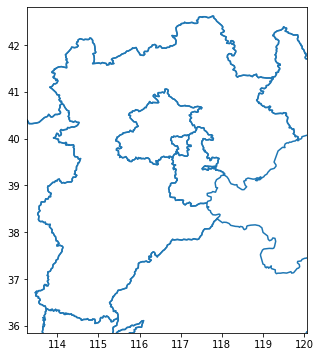

In [73]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(7,5,1)
boundary.boundary.plot(ax=ax)
ax.set_xlim(map(2)[0])
ax.set_ylim(map(2)[1])